In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
% matplotlib inline

In [3]:
filename = './spambase.data'

In [4]:
col_filename = './spambase.names'

In [5]:
df = pd.read_csv(filename, header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
X = df.drop(labels=57, axis = 1).as_matrix()
y = df[57].as_matrix()

In [8]:
print X.shape
print y.shape

(4601, 57)
(4601,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(3680, 57)
(921, 57)
(3680,)
(921,)


In [11]:
class fisher_classifier:
    def fit(self, X,y):
                
        self.label_one = np.unique(y)[0]
        self.label_two = np.unique(y)[1]

        class_one = X[y == self.label_one]
        class_two = X[y == self.label_two]
        
        self.covariance1 = np.cov(class_one, rowvar = False)
        self.covariance2 = np.cov(class_two, rowvar = False)
        
        self.mean1 = np.mean(class_one, axis = 0)
        self.mean2 = np.mean(class_two, axis = 0)
         
        self.vector = (np.linalg.inv(self.covariance1+self.covariance2)).dot(self.mean1 - self.mean2)
                
        self.pmean1 = self.vector.dot(self.mean1)
        self.pmean2 = self.vector.dot(self.mean2)
        
        self.pcov1 = (self.vector.T.dot(self.covariance1)).dot(self.vector)
        self.pcov2 = (self.vector.T.dot(self.covariance2)).dot(self.vector)
                
    def predict(self, X):
        
        pX = X.dot(self.vector)
        
        prob1 = np.exp(-1/2*((pX-self.pmean1)/self.pcov1)**2)/self.pcov1*np.sqrt(2*np.pi)
        prob2 = np.exp(-1/2*((pX-self.pmean2)/self.pcov2)**2)/self.pcov2*np.sqrt(2*np.pi)
            
        self.results = np.zeros((X.shape[0],1))
        self.results[prob1 - prob2 > 0] = self.label_one
        self.results[prob1 - prob2 <= 0] = self.label_two
    
    def score(self, y):
        
        y = y.reshape(len(y),1)
        return np.mean(self.results - y == 0)
        
    def confusion_matrix(self, y):
        c_matrix = np.zeros((len(np.unique(y)), len(np.unique(y))))
        
        prediction_one_index = np.where(self.results == self.label_one)[0]
        label_one_index = np.where(y == self.label_one)[0]
        
        prediction_two_index = np.where(self.results == self.label_two)[0]
        label_two_index = np.where(y == self.label_two)[0]
        
        
        for index in prediction_one_index:
            if index in label_one_index:
                c_matrix[0,0] += 1
        
        for index in prediction_two_index:
            if index in label_one_index:
                c_matrix[0,1] += 1
                
        for index in prediction_one_index:
            if index in label_two_index:
                c_matrix[1,0] += 1
        
        for index in prediction_two_index:
            if index in label_two_index:
                c_matrix[1,1] += 1
                
        return c_matrix
            
    def plot(self):
        plt.figure(figsize=(5,5))
        
        x1 = np.linspace(-7,7, 100)
        y1 =np.exp(-1/2*((x1-self.pmean1)/self.pcov1)**2)/self.pcov1*np.sqrt(2*np.pi)
        plt.plot(x1,y1,color = 'b')

        x2 = np.linspace(-7,7, 100)
        y2 =np.exp(-1/2*((x2-self.pmean2)/self.pcov2)**2)/self.pcov2*np.sqrt(2*np.pi)
        plt.plot(x2,y2, color = 'r')
        
        plt.legend(["class one", "class two"])
        

In [12]:
fc = fisher_classifier()

In [13]:
fc.fit(X_train, y_train)

In [14]:
fc.predict(X_test)
fc.score(y_test)

0.90662323561346359

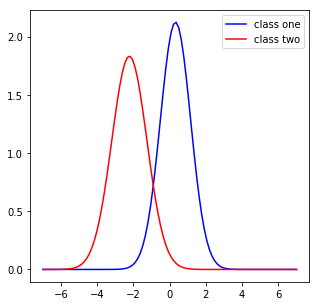

In [15]:
fc.plot()

In [16]:
fc.confusion_matrix(y_test)

array([[ 508.,   36.],
       [  42.,  335.]])